In [1]:
var1 = 'Hello Datawhale!'
var2 = "Python Everwhere!"
 
print("var1[-10:]: ", var1[-10:])
print("var2[1:5]: ", var2[0:7])

var1[-10:]:  Datawhale!
var2[1:5]:  Python 


In [1]:
# 导入所需的package
import seaborn as sns 
from bs4 import BeautifulSoup 
import re 
import requests 
import json 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = []
with open("arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'authors': d['authors'], 'categories': d['categories'], 'authors_parsed': d['authors_parsed']}
        data.append(d)
        
data = pd.DataFrame(data)

In [3]:
data.head()

,authors,categories,authors_parsed
0,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",hep-ph,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,Ileana Streinu and Louis Theran,math.CO cs.CG,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,Hongjun Pan,physics.gen-ph,"[[Pan, Hongjun, ]]"
3,David Callan,math.CO,"[[Callan, David, ]]"
4,Wael Abu-Shammala and Alberto Torchinsky,math.CA math.FA,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [4]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

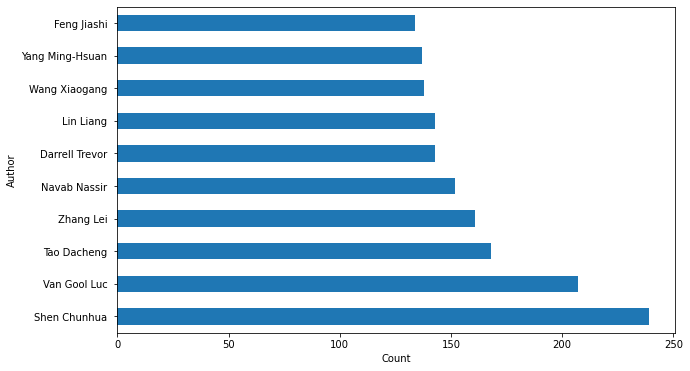

In [5]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.show()

In [6]:
all_authors

[['Likforman-Sulem', 'Laurence', ''],
 ['Zahour', 'Abderrazak', ''],
 ['Taconet', 'Bruno', ''],
 ['Nelwamondo', 'Fulufhelo Vincent', ''],
 ['Marwala', 'Tshilidzi', ''],
 ['Berglund', 'Erik', ''],
 ['Sitte', 'Joaquin', ''],
 ['Zerai', 'Mourad', ''],
 ['Moakher', 'Maher', ''],
 ['Marteau', 'Pierre-François', '', 'VALORIA'],
 ['Ménier', 'Gilbas', '', 'VALORIA'],
 ['Spiller', 'Jonathan M.', ''],
 ['Marwala', 'T.', ''],
 ['Falk', 'D. L.', ''],
 ['Rubin', 'D. M.', ''],
 ['Marwala', 'T.', ''],
 ['Surajpal', 'Dhiresh R.', ''],
 ['Marwala', 'Tshilidzi', ''],
 ['Machowski', 'Lukasz A', ''],
 ['Marwala', 'Tshilidzi', ''],
 ['Graves', 'Alex', ''],
 ['Fernandez', 'Santiago', ''],
 ['Schmidhuber', 'Juergen', ''],
 ['Cohen', 'Asaf', ''],
 ['Weissman', 'Tsachy', ''],
 ['Merhav', 'Neri', ''],
 ['Jacquet', 'W.', ''],
 ['de Groen', 'P.', ''],
 ['Sofge', 'Donald A.', ''],
 ['Beezley', 'Jonathan D.', ''],
 ['Mandel', 'Jan', ''],
 ['Lichtenwalner', 'Peter F.', ''],
 ['Sofge', 'Donald A.', ''],
 ['Scurrell',

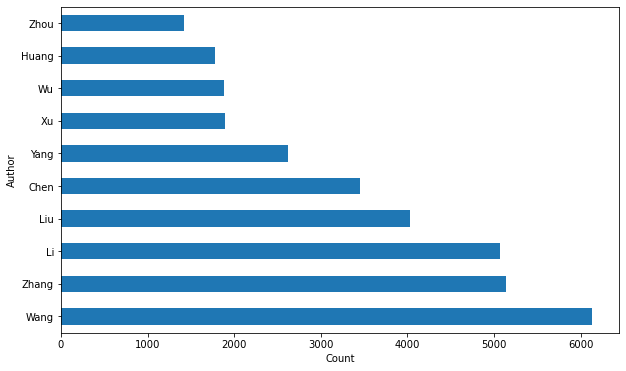

In [9]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')
plt.show()

In [8]:
authors_lastnames[0].value_counts()

Wang                      6137
Zhang                     5144
Li                        5068
Liu                       4029
Chen                      3450
                          ... 
Appel                        1
Fobi                         1
Brummer                      1
Ziarkiewicz-Wroblewska       1
Finnilä                      1
Name: 0, Length: 32928, dtype: int64

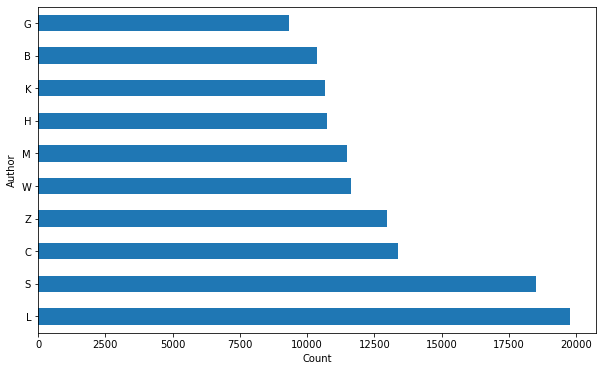

In [20]:
lastnames_firstletters = [x[0][:1] for x in all_authors]
lastnames_firstletters = pd.DataFrame(lastnames_lastletters)

plt.figure(figsize=(10, 6))
lastnames_firstletters[0].value_counts().head(10).plot(kind='barh')

letters = lastnames_firstletters[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(letters)), letters)
plt.ylabel('Author')
plt.xlabel('Count')
plt.show()

['L',
 'Z',
 'T',
 'N',
 'M',
 'B',
 'S',
 'Z',
 'M',
 'M',
 'M',
 'S',
 'M',
 'F',
 'R',
 'M',
 'S',
 'M',
 'M',
 'M',
 'G',
 'F',
 'S',
 'C',
 'W',
 'M',
 'J',
 'd',
 'S',
 'B',
 'M',
 'L',
 'S',
 'S',
 'M',
 'R',
 'S',
 'B',
 'G',
 'C',
 'C',
 'B',
 'M',
 'C',
 'S',
 'B',
 'F',
 'O',
 'G',
 'R',
 'D',
 'R',
 'H',
 'O',
 'O',
 'D',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'M',
 'L',
 'B',
 'P',
 'H',
 'D',
 'M',
 'C',
 'B',
 'M',
 'C',
 'A',
 'K',
 'T',
 'B',
 'K',
 'J',
 'D',
 'X',
 'K',
 'T',
 'O',
 'G',
 'S',
 'A',
 'S',
 'B',
 'E',
 'N',
 'A',
 'C',
 'D',
 'V',
 'A',
 'G',
 'T',
 'I',
 'B',
 'B',
 'B',
 'D',
 'K',
 'E',
 'P',
 'B',
 'P',
 'C',
 'S',
 'A',
 'P',
 'L',
 'O',
 'G',
 'A',
 'R',
 'G',
 'W',
 'Y',
 'L',
 'Z',
 'B',
 'V',
 'J',
 'B',
 'D',
 'L',
 'P',
 'P',
 'M',
 'P',
 'A',
 'I',
 'A',
 'M',
 'S',
 'H',
 'A',
 'M',
 'S',
 'V',
 'C',
 'F',
 'M',
 'M',
 'R',
 'L',
 'K',
 'X',
 'X',
 'G',
 'D',
 'B',
 'C',
 'R',
 'C',
 'N',
 'S',
 'R',
 'L',
 'C',
 'C',
 'B',
 'L',
 'Z',
 'd'